In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
# Linear algebra library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Single perceptron

## Estructura del perceptron (Una sola neurona)

<img src="https://s3.amazonaws.com/stackabuse/media/intro-to-neural-networks-scikit-learn-2.png"  style="width: 1200px;"/>

Función activación: función signo
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Signum_function.svg/1024px-Signum_function.svg.png"  style="width: 300px;"/>

Matemáticamente se puede ver cada señal entrante, $x_i$ $\forall i \in \{1,..,n\}$, como un vector $\vec{x}$ de $n$ entradas. Los pesos, $w_i$ $\forall i \in \{1,..,n\}$, un vector $\vec{w}$ de $n$ entradas y $T$ el umbral. De esta manera el modelo es el siguiente:

\begin{equation}
    f = \left\{
    \begin{array}{ll}
         1 &, \sum_{i=1}^{n}x_i w_i > T\\
         -1 &, \sum_{i=1}^{n}x_i w_i \leq T\\
    \end{array}
    \right.
\end{equation}

Reescribiendo la ecuación anterior para solo trabajar con $w$ definamos, $x_0 = 1$, $w_0 = -T$ y $\sum_{i=0}^{n}x_i w_i = \vec{w}\cdot\vec{x}$, se tiene:

\begin{equation}
    f = \left\{
    \begin{array}{ll}
         1 &, \vec{w}\cdot\vec{x} > 0\\
         -1 &, \vec{w}\cdot\vec{x} \leq 0\\
    \end{array}
    \right.
\end{equation}

Luego el problema se resume en encontrar los valores $\vec{w}$ que optimizan el error entre la predicción $f$ y el resultado real $y$. Para el Perceptron se tiene la siguiente función error, llamada el **criterio del perceptron**:

\begin{equation}
    E(w) = -\sum_{x \in M} (\vec{w}\cdot\vec{x})*y
\end{equation}

donde $M$ es el conjunto de todos los $x$ que no se clasificaron correctamente por los pesos $w$. Como $x$ no está correctamente clasificada, el producto punto tendrá un signo opuesto al valor deseado, $y$, de $x$. Entonces multiplicando por el valor correcto resultará en un valor negativo, forzando el error $E(w)$ a ser positivo

Para minimizar $E(w)$, se usará el algoritmo "stochastic gradient descent" el cuál actualiza el peso de la siguiente manera:

\begin{equation}
    w = w - \nabla_{w}E(w) = w + x_{k}y_{k}
\end{equation}

Donde $\nabla_{w}E(w)$ es el gradiente de $E(w)$ para cada $x_{k}$ que no se encuentre correctamente clasificado.

## Teorema de convergencia del perceptron
Establece que si el conjunto de datos $T$ es linealmente separable, esto es, $\;\exists \vec{w^{*}},\; \forall(x,y) \in T.\ y = sign(\vec{w^{*}}^{T}x)$. Entonces para cualquiera iniciación del vector $\vec{w}$, la regla de aprendizaje del perceptron convergerá a un vector peso (no necesariamente único y no necesariamente $\vec{w^{*}}$) que nos de la correcta clasificación para todos los datos de entrada, y esto se hará en un número finito de pasos.

Se muestra una implementación:

In [52]:
def checkConvergence(X, w, y):
    m = X.shape[0]
    sum_node = X @ w
    # step function
    activation_node = sign_function(sum_node)
    # check convergence
    error = error_function(y, activation_node, X, w)
    if error < 0.001:
        return True, error
    else:
        return False, error

def error_function(y, f, X, w):
    incorrect = (y != f).astype(int)
    indx = get_indx_incorrect(incorrect)
    error = - np.sum(X[indx]@w * y[indx])
    return error

def get_indx_incorrect(incorrect):
    indx = []
    for i in range(len(incorrect)):
        if incorrect[i] == 1:
            indx.append(i)
    return indx
    
def sign_function(z):
    return (z>0).astype(int) - (z<=0).astype(int)

def predict(X, w):
    sum_node = X @ w
    activation_node = sign_function(sum_node)
    return activation_node

In [53]:
from tqdm.autonotebook import tqdm
import time
convergence = False
cont = 0
# data
X = np.array([[1,1],
              [-1,1],
              [1,-1],
              [-1,-1]])

y = np.array([1,-1,-1,-1])
# add bias term
X = np.hstack((np.ones(4).reshape(-1,1),X))
# random initialization of weigths
w = np.random.rand(3)
m = X.shape[0]

P = [] # positive set
N = [] # negative set
for i in range(len(y)):
    if y[i] == 1:
        P.append(i)
    else:
        N.append(i)
        
with tqdm() as pbar:
    while convergence != True:
        indx = np.random.choice(4)
        x = X[indx]
        l = y[indx]
        if indx in P and int(x.dot(w))<=0:
            w = w + x * l
        if indx in N and int(x.dot(w))>=0:
            w = w + x * l
        convergence, dif = checkConvergence(X, w, y)
        pbar.set_description(f'dif {dif}')
        cont += 1
        if cont > 500:
            print('Stuck Method')
            break
        pbar.update(1)

In [54]:
f = predict(X,w)
f

array([ 1, -1, -1, -1])

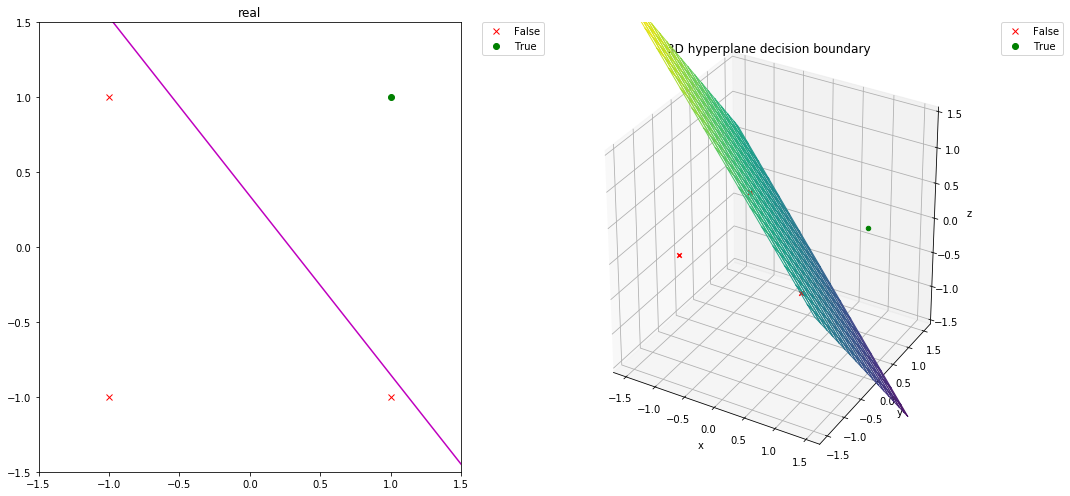

In [55]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

X = np.array([[1,1],
              [-1,1],
              [1,-1],
              [-1,-1]])

y = np.array([1,-1,-1,-1])

# w = np.array([-0.52558756,  1.4177699 ,  1.17914055])

fig = plt.figure(figsize=(15,7))
ax0 = fig.add_subplot(1,2,1)
ax0.set_title('real')
cross, = ax0.plot([],[],'rx')
good, = ax0.plot([],[],'go')
for i in range(len(y)):
    if y[i] == -1:
        ax0.plot(X[i,0], X[i,1], 'rx')
    else:
        ax0.plot(X[i,0],X[i,1], 'go')
ax0.legend(handles = [cross, good], labels = ['False', 'True'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
x_var = np.linspace(-1.5,1.5,10)
y_var = -x_var * (w[1]/w[2]) - w[0]/w[2]
ax0.set_ylim(-1.5,1.5)
ax0.set_xlim(-1.5,1.5)
ax0.plot(x_var, y_var, 'm-')
plt.tight_layout()

ax = fig.add_subplot(1,2,2, projection = '3d')
ax.set_title('3D hyperplane decision boundary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim(-1.5,1.5)

x1 = np.linspace(-1.5,1.5,101)
y1 = np.linspace(-1.5,1.5,101)

X1,Y1 = np.meshgrid(x1, y1)

Z = -X1 * (w[1]/w[2]) - w[0]/w[2] - Y1

norm = plt.Normalize(Z.min(), Z.max())
colors = cm.viridis(norm(Z))
rcount, ccount, _ = colors.shape
surf = ax.plot_surface(X1, Y1, Z,rcount=20, ccount=20,
                    facecolors=colors, shade=False )
surf.set_facecolor((0,0,0,0))
cross, = ax.plot([],[],'rx')
good, = ax.plot([],[],'go')
for i in range(len(y)):
    if y[i] == -1:
        ax.scatter(X[i,0], X[i,1], 0, marker ='x', c='red')
    else:
        ax.scatter(X[i,0],X[i,1], 0, marker='o', c='green')
ax.legend(handles = [cross, good], 
           labels = ['False', 'True'],bbox_to_anchor=(1.05, 1),
           loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


## Non-Linearly separable data

¿Qué ocurre cuando los datos no son linealmente separables?

1.  Solución: Unir perceptrones y crear una red de perceptrones <br>
2.  Problema: Entre más amplia y profunda sea la red neuronal con una función activación no diferenciable con la del perceptron (signo o paso) no será posible encontrar los valores optimos de $\vec{w}$, además no es posible hacer backprop y la función no es convexa (bad-loca-minima) 

Ejemplo:

In [56]:
X = np.array([[1,1,1],
              [1,0,1],
              [1,1,0],
              [1,0,0]])

y = np.array([0,1,1,0])

w1 = np.array([[-0.5, 1.5],
               [1, -1],
               [1, -1]])

w2 = np.array([-1.5, 1, 1])

P = []
N = []
for i in range(len(y)):
    if y[i] == 1:
        P.append(i)
    else:
        N.append(i)
        
def checkConvergence(X, w1, w2, y):
    fcl1 = np.hstack((np.ones((4,1)),X.dot(w1)))
    fcl2 = fcl1.dot(w2)
    d = ((fcl2) > 0).astype(int)
    if np.linalg.norm(d-y) <= 0.1:
        return True, 0
    else:
        return False, np.linalg.norm(d-y)
    
def predict(X,w1, w2):
    fcl1 = np.hstack((np.ones((4,1)),X.dot(w1)))
#     print(fcl1)
    fcl1 = step(fcl1)
#     print(fcl1)
    fcl2 = fcl1.dot(w2)
#     print(fcl2)
    d = ((fcl2) > 0).astype(int)
    return d

def step(z):
    h = (z > 0).astype(int) - (z <= 0).astype(int)
    return h

In [57]:
y_pred = predict(X, w1, w2)
y_pred

array([0, 1, 1, 0])

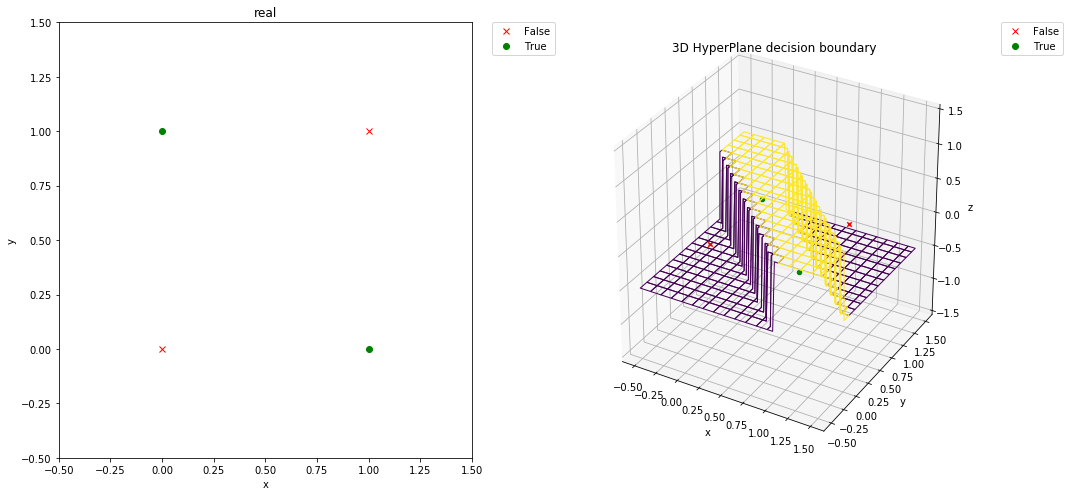

In [58]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

X = np.array([[1,1],
              [0,1],
              [1,0],
              [0,0]])

y = np.array([0,1,1,0])
fig = plt.figure(figsize=(15,7))
ax0 = fig.add_subplot(1,2,1)
ax0.set_title('real')
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_xlim(-0.5,1.5)
ax0.set_ylim(-0.5,1.5)
cross, = ax0.plot([],[],'rx')
good, = ax0.plot([],[],'go')
for i in range(len(y)):
    if y[i] == 0:
        ax0.plot(X[i,0], X[i,1], 'rx')
    else:
        ax0.plot(X[i,0],X[i,1], 'go')
ax0.legend(handles = [cross, good], 
           labels = ['False', 'True'],bbox_to_anchor=(1.05, 1),
           loc='upper left', borderaxespad=0)
plt.tight_layout()

ax = fig.add_subplot(1,2,2, projection = '3d')
ax.set_title('3D HyperPlane decision boundary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim(-1.5,1.5)

x1 = np.linspace(-0.5,1.5,101)
y1 = np.linspace(-0.5,1.5,101)
w1 = np.array([[-0.5, 1.5],
               [1, -1],
               [1, -1]])

w2 = np.array([-1.5, 1, 1])

X1,Y1 = np.meshgrid(x1, y1)

Z = ((w1[1,0]*X1+w1[2,0]*Y1+w1[0,0]) > 0).astype(int) *w2[1] + ((w1[1,1]*X1+w1[2,1]*Y1+w1[0,1]) > 0).astype(int)*w2[2] + w2[0]

norm = plt.Normalize(Z.min(), Z.max())
colors = cm.viridis(norm(Z))
rcount, ccount, _ = colors.shape
surf = ax.plot_surface(X1, Y1, Z,rcount=20, ccount=20,
                    facecolors=colors, shade=False )
surf.set_facecolor((0,0,0,0))
cross, = ax.plot([],[],'rx')
good, = ax.plot([],[],'go')
for i in range(len(y)):
    if y[i] == 0:
        ax.scatter(X[i,0], X[i,1], 0, marker ='x', c='red')
    else:
        ax.scatter(X[i,0],X[i,1], 0, marker='o', c='green')
ax.legend(handles = [cross, good], 
           labels = ['False', 'True'],bbox_to_anchor=(1.05, 1),
           loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

## Solución:
la solución dada al problema presentado anteriormente fue la idea de backpropagation (derivadas parciales de manera recursiva), y la propuesta de otras funciones activación no lineales suaves (función continuamente diferenciable). Las principales son:
<br>
**Sigmoid**:
\begin{equation}
    \sigma(x) = \frac{1}{1+e^{-x}}
\end{equation}

![](http://cs231n.github.io/assets/nn1/sigmoid.jpeg)

**Tanh**: 
\begin{equation}
    \tanh(x) = 2\sigma(2x)-1
\end{equation}
![](http://cs231n.github.io/assets/nn1/tanh.jpeg)

**ReLu**: The rectified Linear Unit.
\begin{equation}
    f(x) = max(0,x) = \left\{
                            \begin{array}{ll}
                                 x &, x \geq 0\\
                                 0 &, x \leq 0\\
                            \end{array}
                      \right.
\end{equation}
![](http://cs231n.github.io/assets/nn1/relu.jpeg)
Esta es la única que no es suave en todo $R$ pues no es diferenciable en $x = 0$, en la práctica se le suele dar cualquier valor porque $f(0)$ no suele presentarse. Una posibilidad es $\epsilon = 0.000000001$ el cual es 0, se considera 1 el gradiente a este valor.

La otra posibilidad encontrar una aproximación de la función ReLu que sea suave. Una familia de aproximaciones sería:
\begin{equation}
    f_k(x) := \frac{1}{2k}log(1+e^{2kx})
\end{equation}
Para $k$ mayores, mejor $f_k$ aproxima la función ReLu, como se puede ver en la siguiente imagen:

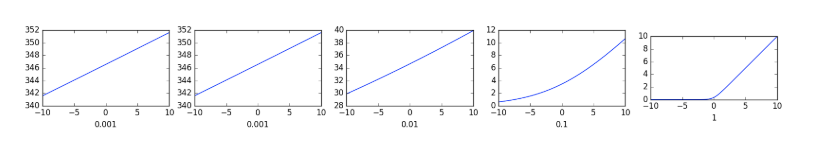

El motivo por el que ReLu es la que más se usa es debido a que es la más rápida y tiene menos gasto computacional.


## BackPropagation method
BackPropagation es la manera de calcular gradientes aplicando regla de la cadena de manera recursiva. El problema principal es el siguiente, tenemos una función $f(x)$  donde $x$ es un vector de entradas y estamos interesados en calcular el gradiente de $f$ en $x$ ($\nabla f(x)$). <br>

En el caso específico de una red neuronal, $f$ corresponde a la función error o perdida ($L$) y la entrada $x$ consiste en los datos de entrenamiento y los pesos de la red neuronal. Por ejemplo, la función error puede ser la norma de la diferencia al cuadrado o la función error de support vector machines, los datos de entrada serían los datos de entrenamiento $(x_i,y_i), \; i=1...N$, los pesos y los biases $W, \; b$. Los datos de entrenamiento son fijos, y los pesos son las variables que se optimizarán. Luego usaremos backpropagation para calcular el gradiente de las variables $W, \; b$ y así poder usarlos para actualizar los parametros. Sin embargo clacular el gradiente en $(x_i,y_i)$ puede ser usado para visualizar e interpretar que es lo que la red neuronal puede estar haciendo. <br>

Veamos el ejemplo de $f(x,y,z) = (x+y)z$. Esta expresión es bastante simple para diferenciar directamente, pero veamos como funciona backpropagation. La expresión se puede dividir en dos: $q=x+y$ y $f=qz$. Calculando tenemos: 

\begin{equation}
    \frac{\partial{f}}{\partial{q}} = z \\
    \frac{\partial{f}}{\partial{z}} = q \\
    \frac{\partial{q}}{\partial{x}} = 1 \\
    \frac{\partial{q}}{\partial{y}} = 1 \\
\end{equation}

Aplicando regla de la cadena tenemos para hallar $\frac{\partial{f}}{\partial{z}}$, $\frac{\partial{f}}{\partial{x}}$, $\frac{\partial{f}}{\partial{y}}$:

\begin{equation}
    \frac{\partial{f}}{\partial{y}} = \frac{\partial{f}}{\partial{q}}\frac{\partial{q}}{\partial{y}} = z * 1\\
    \frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{q}}\frac{\partial{q}}{\partial{x}} = z * 1\\
    \frac{\partial{f}}{\partial{z}} = q \\
\end{equation}

Si le damos valores $x = -2$, $y = 5$, $z = -4$ que se muestra en el siguiente grafo computacional, donde los valores en verde es el forwardpropagation del grafo y en rojo es el backpropagation mostrando los valores del gradiente de $f$ con respecto a cada variable:
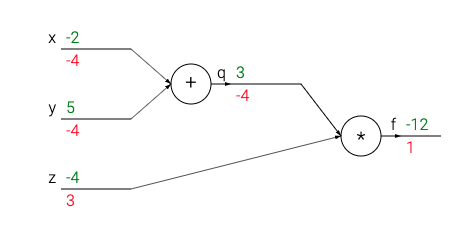

Es decir, en cada nodo del grafo computacional recibe ciertos datos de entrada y se puede computar dos cosas: 
1. Su valor de salida.
2. Su gradiente local en ese nodo del valor de salida con respecto al dato entrante.

Note que los nodos realizan este proceso totalmente independiente sin necesidad de tener en cuenta todo el grafo. Sin embargo, una vez completado el forward propagation, durante el backprop los nodos eventualmente aprenderán sobre el gradiente de su valor de salida del grafo entero. Regla de la cadena dice que el nodo debe tomar ese gradiente y multiplicarlo por cada gradiente local que se computó anteriormente. Veamos el siguiente ejemplo con una red neuronal que usa la función activación sigmoid.<br>

**Ejemplo:**

\begin{equation}
    f(w,x) = \frac{1}{1+e^{-(w_0x_0+w_1x_1+w_2)}}
\end{equation}

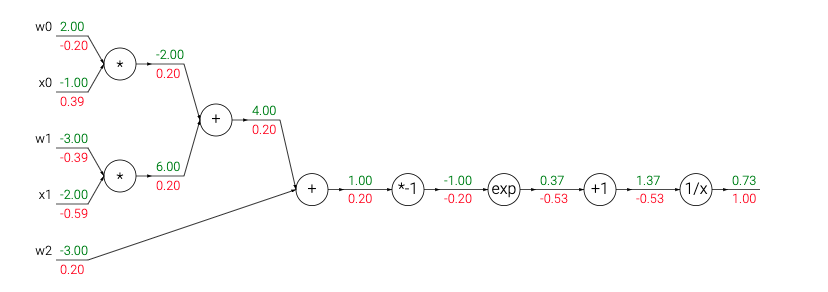

La derivada de la función sigmoid es:

\begin{equation}
    \sigma(x) = \frac{1}{1+e^{-x}}\\
    \frac{d\sigma(x)}{dx} = \frac{e^{-x}}{(1+e^{-x})} = \left(\frac{1+e^{-x}-1}{1+e^{-x}}\right) \left(\frac{1}{1+e^{-x}}\right) = (1-\sigma(x))\sigma(x)
\end{equation}

## Regla para actualizar los parametros
El algoritmo que se usará es del gradiente descendiente con el proceso es el siguiente:

1. Obtener el gradiente usando el backprop.
2. El gradiente es la dirección del máximo crecimiento de la función, luego el gradiente descendiente es actualizar los parametros $w$ de la función error $L$ para minimizarla en dirección contraria al gradiente.

\begin{equation}
    w = w - \alpha\nabla L(x,w)
\end{equation}

# 2D gradient descent

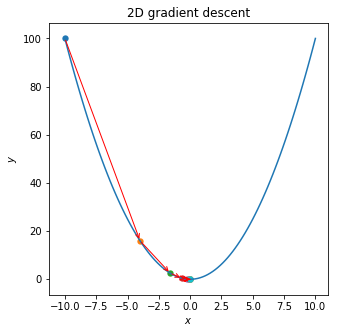

In [59]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

def f(x):
    return x**2

def df(x):
    return 2*x

x = np.linspace(-10, 10, 101)
y = lambda x: f(x)

fig = plt.figure(figsize=(5,5))
plt.plot(x, y(x))
plt.title('2D gradient descent')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

x_init = -10
X = [x_init]
Y = [y(x_init)]
# Begin Gradient descent with N steps and a learning reate
N = 10
alpha = 0.3

for j in range(N):
    last_X = X[-1]
    this_X = last_X - alpha * df(last_X)
    X.append(this_X)
    Y.append(y(this_X))


theta = []
for j in range(len(X)):
    val_X = X[j]
    val_Y = Y[j]
    theta.append(np.array((val_X, val_Y)))

for j in range(N):
    if j>0:
        plt.annotate('',xy=theta[j], xytext=theta[j-1],
                    arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                    va='center', ha='center')
    plt.scatter(X[j], Y[j], s=40, lw=0)


plt.show()

# 3D gradient descent

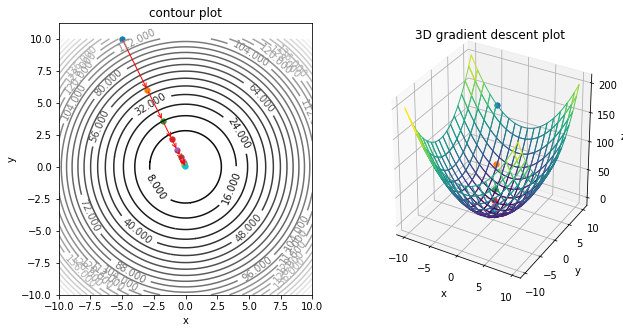

In [60]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

def f(x,y):
    return x**2 + y**2

def dfdy(x,y):
    return 2*y

def dfdx(x,y):
    return 2*x

fig =  plt.figure(figsize=(10,5))
ax0 =  fig.add_subplot(1,2,1)
ax0.set_title('contour plot')
ax0.set_xlabel('x')
ax0.set_ylabel('y')

ax = fig.add_subplot(1,2,2, projection = '3d')
ax.set_title('3D gradient descent plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

x = np.linspace(-10,10,101)
y = np.linspace(-10,10,101)

X,Y = np.meshgrid(x, y)
Z = f(X,Y)
norm = plt.Normalize(Z.min(), Z.max())
colors = cm.viridis(norm(Z))
rcount, ccount, _ = colors.shape
surf = ax.plot_surface(X, Y, Z,rcount=20, ccount=20,
                    facecolors=colors, shade=False )
surf.set_facecolor((0,0,0,0))
contours = ax0.contour(X, Y, Z, 30)
ax0.clabel(contours)

# Take N steps with learning rate alpha down the steepest gradient, starting at (0,0)
N = 10
alpha = 0.2
p_init = (-5,10)
P = [np.array(p_init)]
F = [f(*P[0])]

for i in range(N):
    last_P = P[-1]
    new_P = np.zeros(2)
    new_P[0] = last_P[0] - alpha*dfdx(last_P[0], last_P[1])
    new_P[1] = last_P[1] - alpha*dfdy(last_P[0], last_P[1])
    P.append(new_P)
    F.append(f(new_P[0], new_P[1]))

colors = cm.rainbow(np.linspace(0, 1, N+1))


for j in range(0,N):
    if j>0:
        ax0.annotate('',xy=P[j], xytext=P[j-1],
                    arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                    va='center', ha='center')
    ax0.scatter(P[j][0], P[j][1], s=40, lw=0)
    ax.scatter(P[j][0], P[j][1], F[j], s=40, lw = 0)

plt.show()

# Linear Regression example

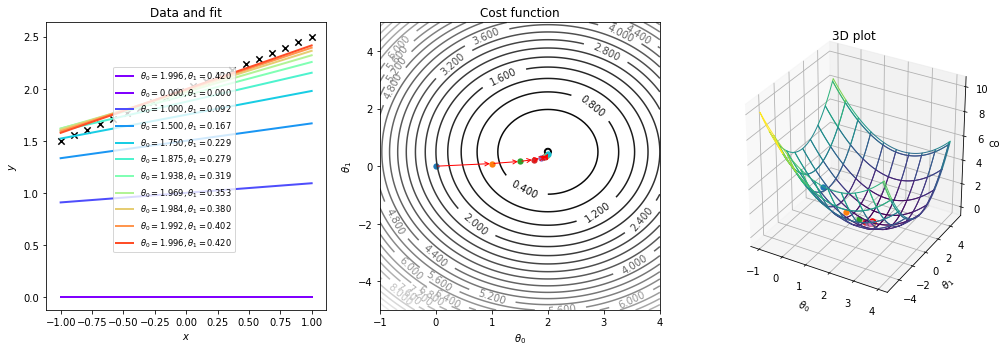

In [61]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

# The data to fit
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# Figure
fig =  plt.figure(figsize=(14,5))

# First plot
ax = fig.add_subplot(1,3,1)

# Scatter plot on the real data
ax.scatter(x, y, marker = 'x', s = 40, color = 'k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                theta1_grid[:,np.newaxis,np.newaxis])

# Setup for 3d plot or surface plot
X, Y = np.meshgrid(theta0_grid, theta1_grid)

# Contour plot
ax1 = fig.add_subplot(1,3,2)
ax1.set_title('Contour plot')
contours = ax1.contour(X, Y, J_grid, 30)
ax1.clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax1.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Surface Plot
ax2 = fig.add_subplot(1,3,3, projection = '3d')
# ax2.plot_wireframe(X, Y, J_grid, rstride=10, cstride=10,
#                     linewidth=1, antialiased=False, cmap=cm.coolwarm)
norm = plt.Normalize(J_grid.min(), J_grid.max())
colors = cm.viridis(norm(J_grid))
rcount, ccount, _ = colors.shape

surf = ax2.plot_surface(X, Y, J_grid, rcount=10, ccount=10,
                    facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))
# plot the real point
ax2.scatter([theta0_true]*2,[theta1_true]*2, cost_func(theta0_true, theta1_true), s=50 ,color=['r'])

# Take N steps with learning rate alpha down the steepest gradient, starting at (0,0)
N = 10
alpha = 0.5

# Initial theta
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))

colors = cm.rainbow(np.linspace(0, 1, N+1))
ax.plot(x, hypothesis(x, *theta[0]), color = colors[0], lw = 2, label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))

for j in range(0,N):
    if j>0:
        ax1.annotate('',xy=theta[j], xytext=theta[j-1],
                    arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                    va='center', ha='center')
    ax.plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
            label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
    ax1.scatter(theta[j][0], theta[j][1], s=40, lw=0)
    ax2.scatter(theta[j][0], theta[j][1], J[j], s=40, lw = 0)

# Labels, titles and a legend.
ax1.set_xlabel(r'$\theta_0$')
ax1.set_ylabel(r'$\theta_1$')
ax1.set_title('Cost function')
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
ax2.set_zlabel(r'cost')
ax2.set_title('3D plot')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Data and fit')
axbox = ax.get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax.legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
            fontsize='small')
plt.tight_layout()
plt.show()

# Sigmoid multi-layer neuron

In [62]:
# My neural net model
from neural_net import neural_net
from vis_utils import plotStats, plotData
from gradient_utils import gradient_difference

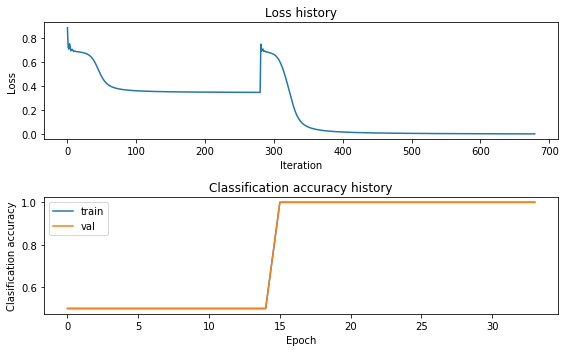

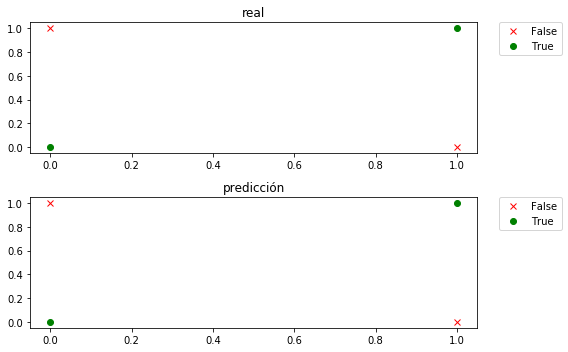

In [63]:
X = np.array([[1,1],
              [0,1],
              [1,0],
              [0,0]])

y = np.array([1,0,0,1])

net_params = {'il':2,'hl1':2,'ol':1}
activ_function = 'Sigmoid'
cost_function = 'Entropy_Loss'
net = neural_net(net_params, activation_function= activ_function,
                 cost_function= cost_function, std= 1)
results = net.train_sgd_momentum(X, y, X, y, learning_rate=2.1, 
                                 learning_rate_decay=1, reg = 0.0,
                                max_iter = 400, batch_size = 2, verbose =  True, rho=0.7,
                                 stochastic = False, epoch = 20)
plotStats(results)

y_pred = net.predict(X)
plotData(X, y, y_pred)

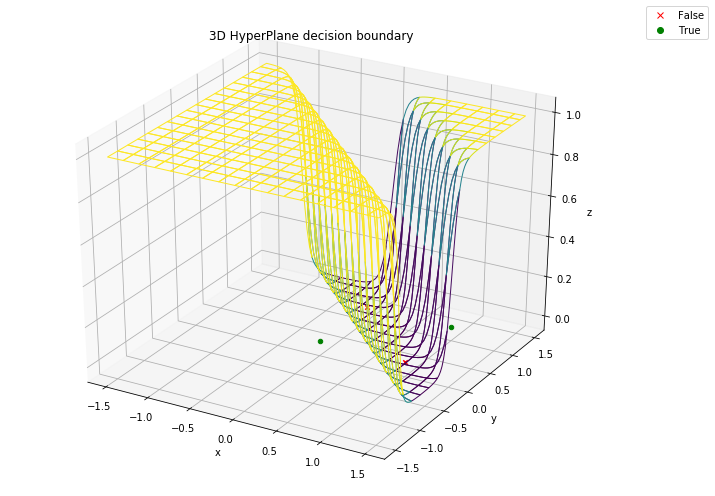

In [64]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

X = np.array([[1,1],
              [0,1],
              [1,0],
              [0,0]])

y = np.array([1,0,0,1])

# params = {'W1': np.array([[ 6.03878347, -6.70829504],
#         [ 6.03877163, -6.70825261]]),
#  'b1': np.array([ 9.33092666, -2.72624356]),
#  'W2': np.array([[11.97407601],
#         [12.07598502]]),
#  'b2': np.array([5.8718201])}

params = net.function_params

def sigmoid( z):
    """
    Return the sigmoid function evaluated at z
    """
    g = 1/(1 + np.exp(-z))
    return g

w = params
x1 = np.linspace(-1.5,1.5,101)
y1 = np.linspace(-1.5,1.5,101)

w1 = w['W1']
b1 = w['b1']
w2 = w['W2']
b2 = w['b2']


X1,Y1 = np.meshgrid(x1, y1)

Z = sigmoid(sigmoid(X1*w1[0,0]+ Y1*w1[1,0] - b1[0])*w2[0,0] + sigmoid(X1*w1[0,1]+ Y1*w1[1,1] - b1[1])*w2[1,0] - b2[0])


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1, projection = '3d')
ax.set_title('3D HyperPlane decision boundary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


norm = plt.Normalize(Z.min(), Z.max())
colors = cm.viridis(norm(Z))
rcount, ccount, _ = colors.shape
surf = ax.plot_surface(X1, Y1, Z,rcount=20, ccount=20,
                    facecolors=colors, shade=False )
surf.set_facecolor((0,0,0,0))
cross, = ax.plot([],[],'rx')
good, = ax.plot([],[],'go')
for i in range(len(y)):
    if y[i] == 0:
        ax.scatter(X[i,0], X[i,1], 0, marker ='x', c='red')
    else:
        ax.scatter(X[i,0],X[i,1], 0, marker='o', c='green')
ax.legend(handles = [cross, good], 
           labels = ['False', 'True'],bbox_to_anchor=(1.05, 1),
           loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

## Algoritmos de gradiente descendente
- Stochastic gradient descent
- Stochastic gradient descent with momemtum
- Adam 

## Problema de la convexidad de la función error de una red neuronal
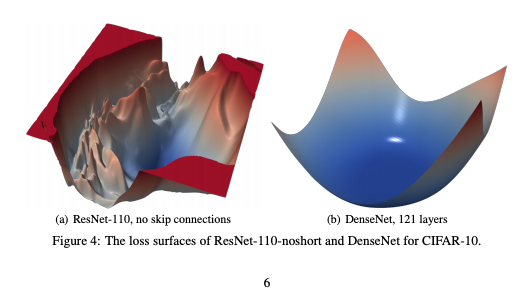

bibliografía: https://papers.nips.cc/paper/7875-visualizing-the-loss-landscape-of-neural-nets.pdf

# MNIST DATASET
- Conjunto de imagenes de digitos

In [65]:
# My neural net model
from neural_net import neural_net
from vis_utils import plotStats, plotData
from gradient_utils import gradient_difference
# from tuning_utils import tuning_hyper_parameter
from vis_utils import visualize_grid_withoutRGB, visualize_grid

# Linear algebra library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
from vis_utils import visualize_grid_withoutRGB, visualize_grid
def show_net_weights(net, Wkey):
    plt.figure(figsize=(7,7))
    W1 = net.function_params[Wkey]
    Z, N = W1.shape
    size = int(np.sqrt(Z))
    W1 = W1.reshape(size, size,-1).transpose(2,0,1)
    print(W1.shape)
    plt.imshow(visualize_grid_withoutRGB(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

In [67]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,100*np.max(predictions_array),true_label),color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [68]:
# Loading digits dataset
from scipy.io import loadmat
from mlxtend.data import loadlocal_mnist
seminario_path = '/kaggle/input/seminariodataset/'
digits_image_path = seminario_path+'data/mnist-dataset/train_images'
digits_labels_path = seminario_path+'data/mnist-dataset/train_labels'
test_image_path = seminario_path+'data/mnist-dataset/test_images'
test_labels_path = seminario_path+'data/mnist-dataset/test_labels'
train_images, train_labels = loadlocal_mnist(images_path= digits_image_path, 
                                 labels_path = digits_labels_path)
test_images, test_labels = loadlocal_mnist(images_path = test_image_path, 
                                           labels_path = test_labels_path)

In [69]:
# shape of the images
print(f'shape of train_images dataset : {train_images.shape}')
print(f'shape of train_labels dataset : {train_labels.shape} ')
print(f'shape of test_images dataset : {test_images.shape}')
print(f'shape of test_labels dataset : {test_labels.shape} ')

shape of train_images dataset : (60000, 784)
shape of train_labels dataset : (60000,) 
shape of test_images dataset : (10000, 784)
shape of test_labels dataset : (10000,) 


In [70]:
num_samples, pixels_square = train_images.shape
pixel_size = int(np.sqrt(pixels_square))
train_images = train_images.reshape(num_samples, pixel_size, pixel_size)
print(train_images.shape)
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


## Showing some Images

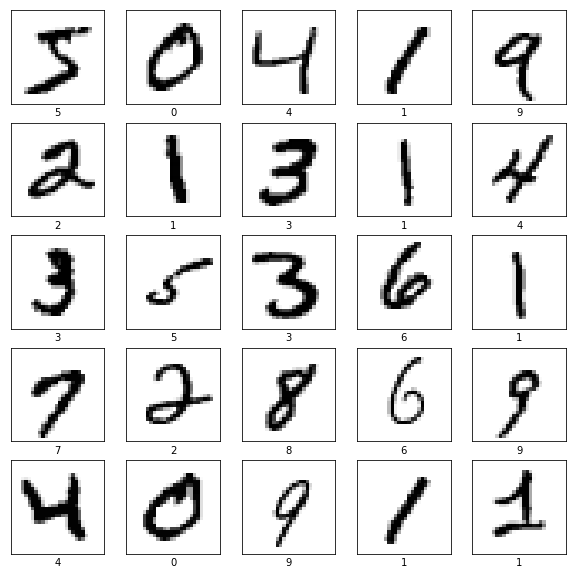

In [71]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Prepare the data

In [72]:
train_images = train_images.reshape(num_samples, pixel_size, pixel_size)
print(train_images.shape)
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print(test_images.shape)
mean_image = np.mean(train_images, axis = 0) 
#Normalize the data is very important for fastest converge
#X = train_images - mean_image 
#X_val = test_images - mean_image
X = train_images
X_val = test_images
# X = train_images
# X_val = test_images
X_val = X_val.reshape(X_val.shape[0], -1)
X = X.reshape(num_samples, -1)

(60000, 28, 28)
(10000, 28, 28)


In [73]:
y = train_labels
y_val = test_labels

## Small model

In [74]:
reg = 0
net_params = {'il': 784, 'hl1': 25, 'ol': 10}
activ_function = 'Sigmoid'
cost_function = 'Entropy_Loss'
lr = 0.09
# activ_function = 'ReLu'
# cost_function = 'SoftMax'
#lr = 0.0005
# max_iter = 10000
max_iter = 2000
net = neural_net(net_params=net_params, activation_function=activ_function,
                cost_function=cost_function, std = 1)

results = net.train_stochastic_gradient_descent(X, y, X_val, y_val,
                                                learning_rate = lr, reg = reg,
                                               max_iter = max_iter, batch_size = 100,
                                               verbose = True, epoch = 200)

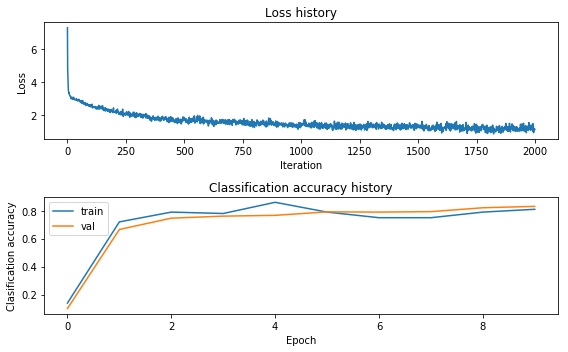

80.99833333333333
82.19999999999999
(25, 28, 28)


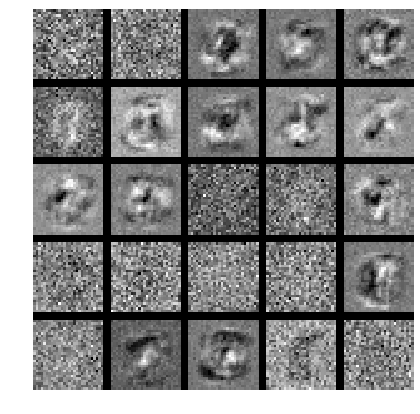

In [75]:
plotStats(results)
y_pred = net.predict(X)
print(f'{(y_pred == y).mean() * 100}')
y_pred_val, y_score_val = net.predict(X_val, with_score=True)
print(f'{(y_pred_val == y_val).mean() * 100}')
show_net_weights(net, 'W1')

In [76]:
reg = 0
net_params = {'il': 784, 'hl1': 25, 'ol': 10}
# activ_function = 'Sigmoid'
# cost_function = 'Entropy_Loss'
# lr = 0.5
activ_function = 'ReLu'
cost_function = 'SoftMax'
lr = 0.0005
max_iter = 2000
net = neural_net(net_params=net_params, activation_function=activ_function,
                cost_function=cost_function, std = 1e-4)
results = net.train_stochastic_gradient_descent(X, y, X_val, y_val,
                                                learning_rate = lr, reg = reg,
                                               max_iter = max_iter, batch_size = 100,
                                               verbose = True, epoch = 200)

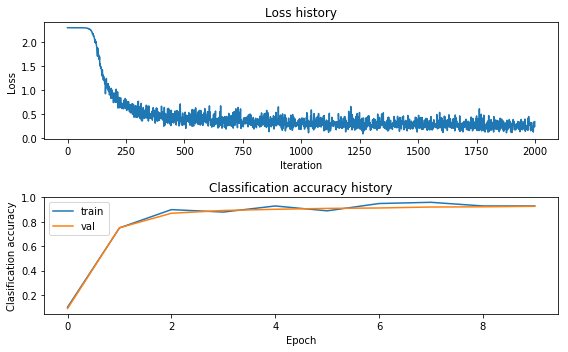

92.77833333333334
92.80000000000001
(25, 28, 28)


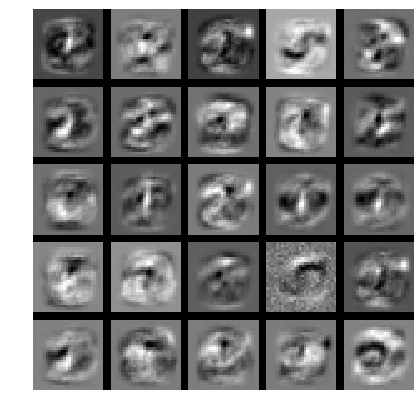

In [77]:
plotStats(results)
y_pred = net.predict(X)
print(f'{(y_pred == y).mean() * 100}')
y_pred_val, y_score_val = net.predict(X_val, with_score=True)
print(f'{(y_pred_val == y_val).mean() * 100}')
show_net_weights(net, 'W1')

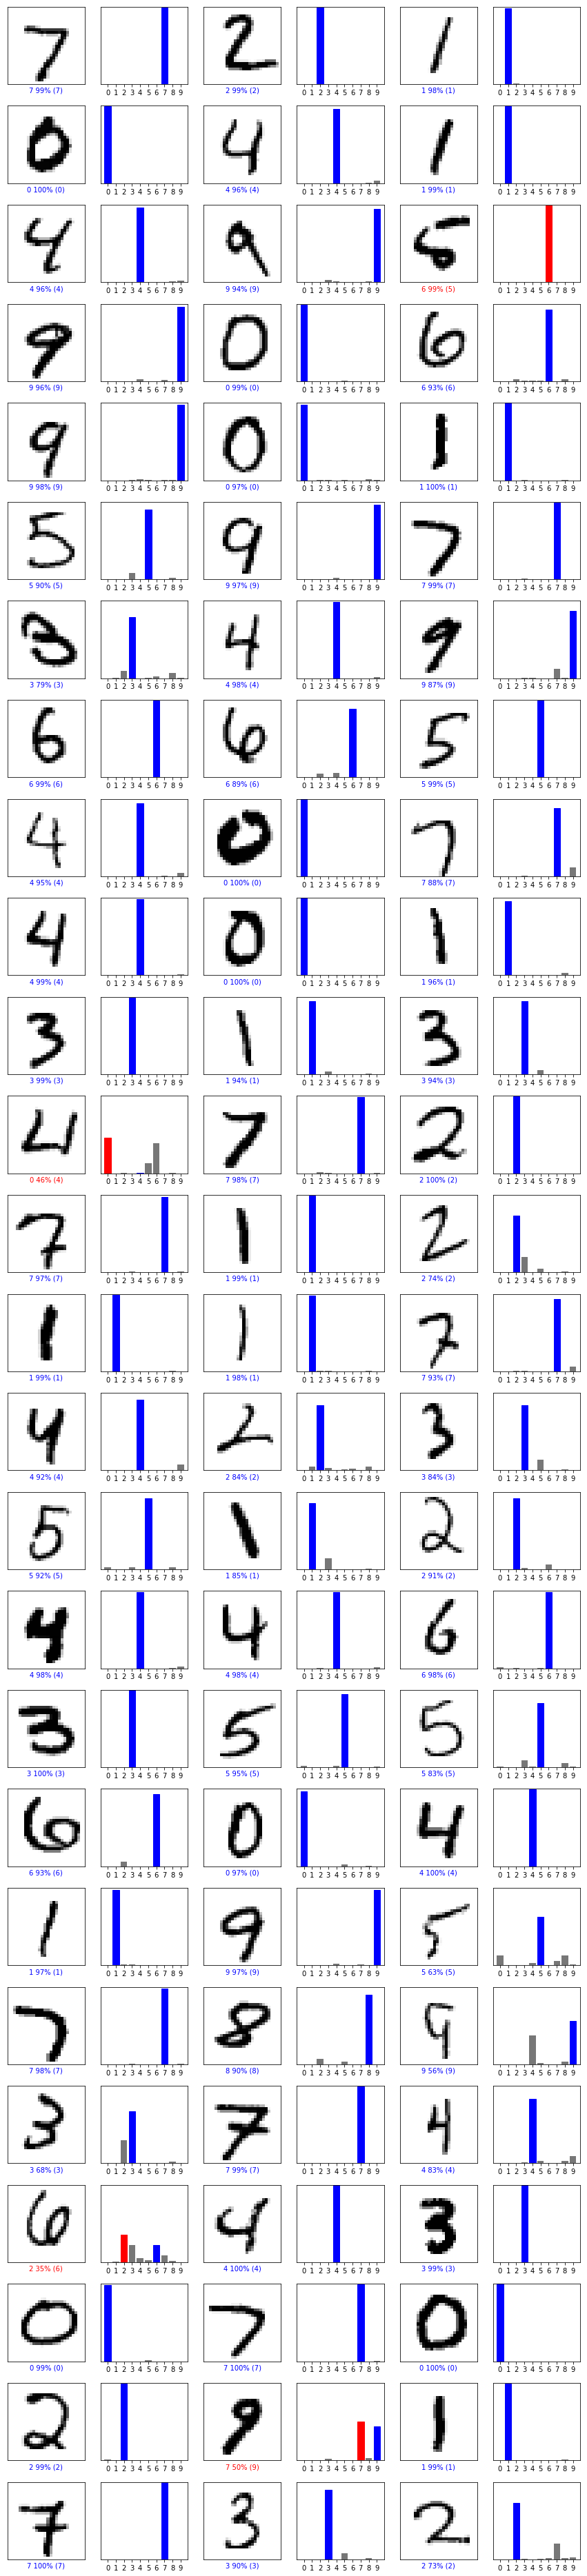

In [78]:
num_rows = 26
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_score_val[i], y_val, X_val.reshape(len(y_val), 28, 28))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_score_val[i], y_val)
plt.tight_layout()
plt.show()

## Deep model

In [79]:
reg = 0
net_params = {'il': 784, 'hl1': 225, 'ol': 10}
activ_function = 'Sigmoid'
cost_function = 'Entropy_Loss'
lr = 0.09
# activ_function = 'ReLu'
# cost_function = 'SoftMax'
# lr = 0.0005
max_iter = 2000
net = neural_net(net_params=net_params, activation_function=activ_function,
                cost_function=cost_function, std = 1)
results = net.train_stochastic_gradient_descent(X, y, X_val, y_val,
                                                learning_rate = lr, reg = reg,
                                               max_iter = max_iter, batch_size = 100,
                                               verbose = True, epoch = 200)

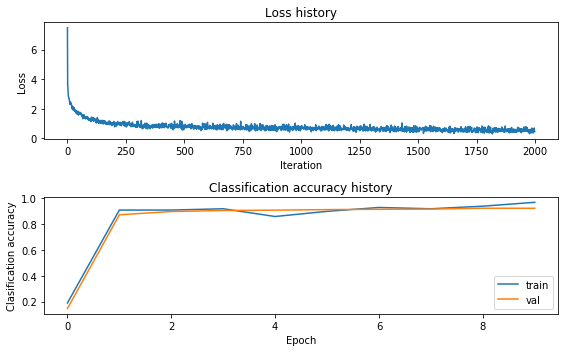

92.675
93.10000000000001
(225, 28, 28)


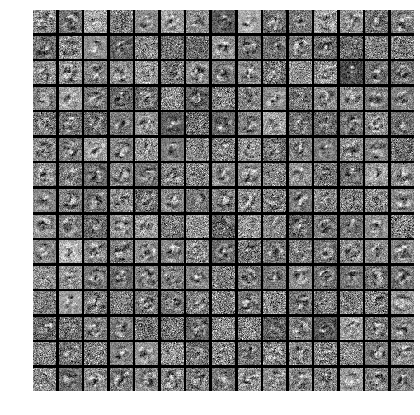

In [80]:
plotStats(results)
y_pred = net.predict(X)
print(f'{(y_pred == y).mean() * 100}')
y_pred_val, y_score_val = net.predict(X_val, with_score=True)
print(f'{(y_pred_val == y_val).mean() * 100}')
show_net_weights(net, 'W1')

In [81]:
reg = 0
net_params = {'il': 784, 'hl1': 225, 'ol': 10}
#activ_function = 'Sigmoid'
#cost_function = 'Entropy_Loss'
#lr = 0.5
activ_function = 'ReLu'
cost_function = 'SoftMax'
lr = 0.0005
max_iter = 2000
net = neural_net(net_params=net_params, activation_function=activ_function,
                cost_function=cost_function, std = 1e-4)
results = net.train_stochastic_gradient_descent(X, y, X_val, y_val,
                                                learning_rate = lr, reg = reg,
                                               max_iter = max_iter, batch_size = 100,
                                               verbose = True, epoch = 200)

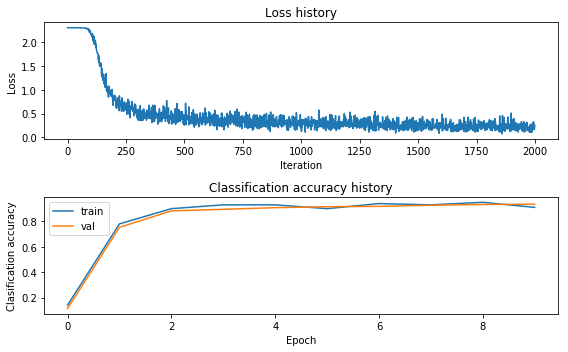

93.69166666666666
93.81
(225, 28, 28)


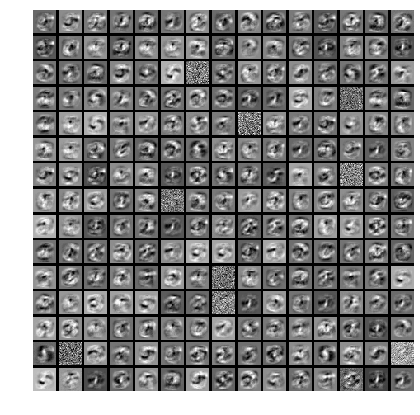

In [82]:
plotStats(results)
y_pred = net.predict(X)
print(f'{(y_pred == y).mean() * 100}')
y_pred_val, y_score_val = net.predict(X_val, with_score=True)
print(f'{(y_pred_val == y_val).mean() * 100}')
show_net_weights(net, 'W1')

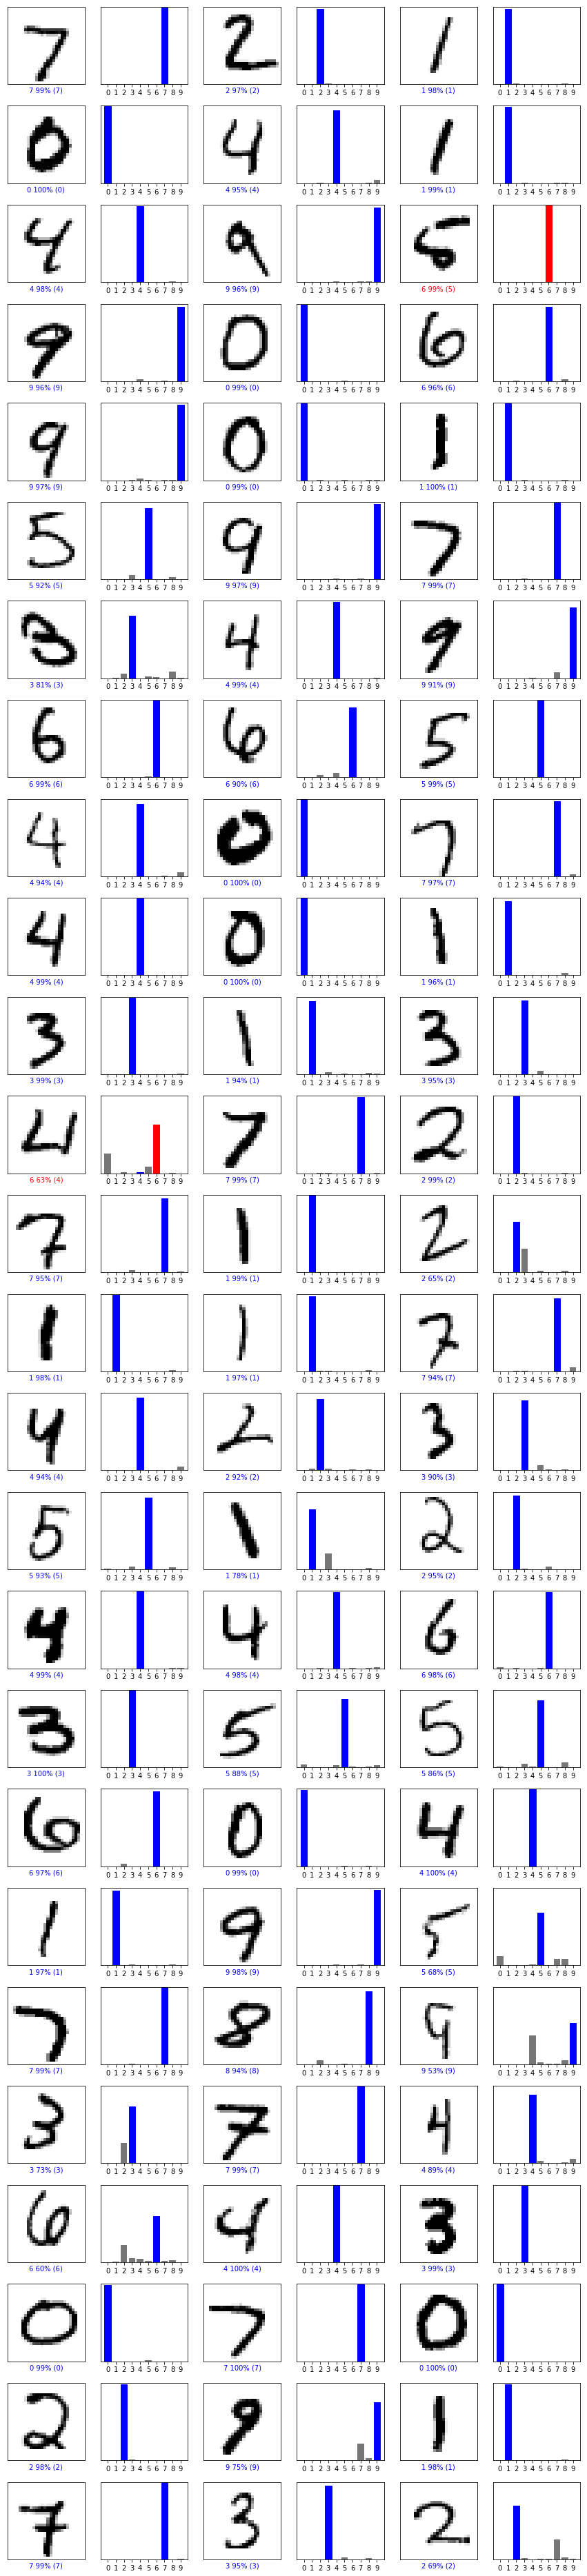

In [83]:
num_rows = 26
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_score_val[i], y_val, X_val.reshape(len(y_val), 28, 28))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_score_val[i], y_val)
plt.tight_layout()
plt.show()

# CIFAR10 Dataset


In [84]:
# My neural net model
from neural_net import neural_net
from vis_utils import plotStats, plotData
from gradient_utils import gradient_difference
# from tuning_utils import tuning_hyper_parameter
from vis_utils import visualize_grid_withoutRGB, visualize_grid

# Linear algebra library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
from vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    plt.rcParams['figure.figsize'] = (8, 8) # set default size of plots
    W1 = net.function_params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()
    
    
def plot_image(i, predictions_array, true_label, img):
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 
               'frog', 'horse', 'ship', 'truck']
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.astype('uint8'))

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                         100*np.max(predictions_array),true_label),
                                           color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

## Loading dataset

In [131]:
from features import color_histogram_hsv, hog_feature
from data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    seminario_path = '/kaggle/input/seminariodataset/'
    # Load the raw CIFAR-10 data
    cifar10_dir = seminario_path+'data/cifar-10-batches-py'

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    mean_image = np.mean(X_train, axis=0)
    
    return X_train, y_train, X_val, y_val, X_test, y_test, mean_image

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_val, y_val, X_test, y_test, mean_image = get_CIFAR10_data()
print('Finish Loading Datasets')

Clear previously loaded data.
Finish Loading Datasets


In [87]:
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


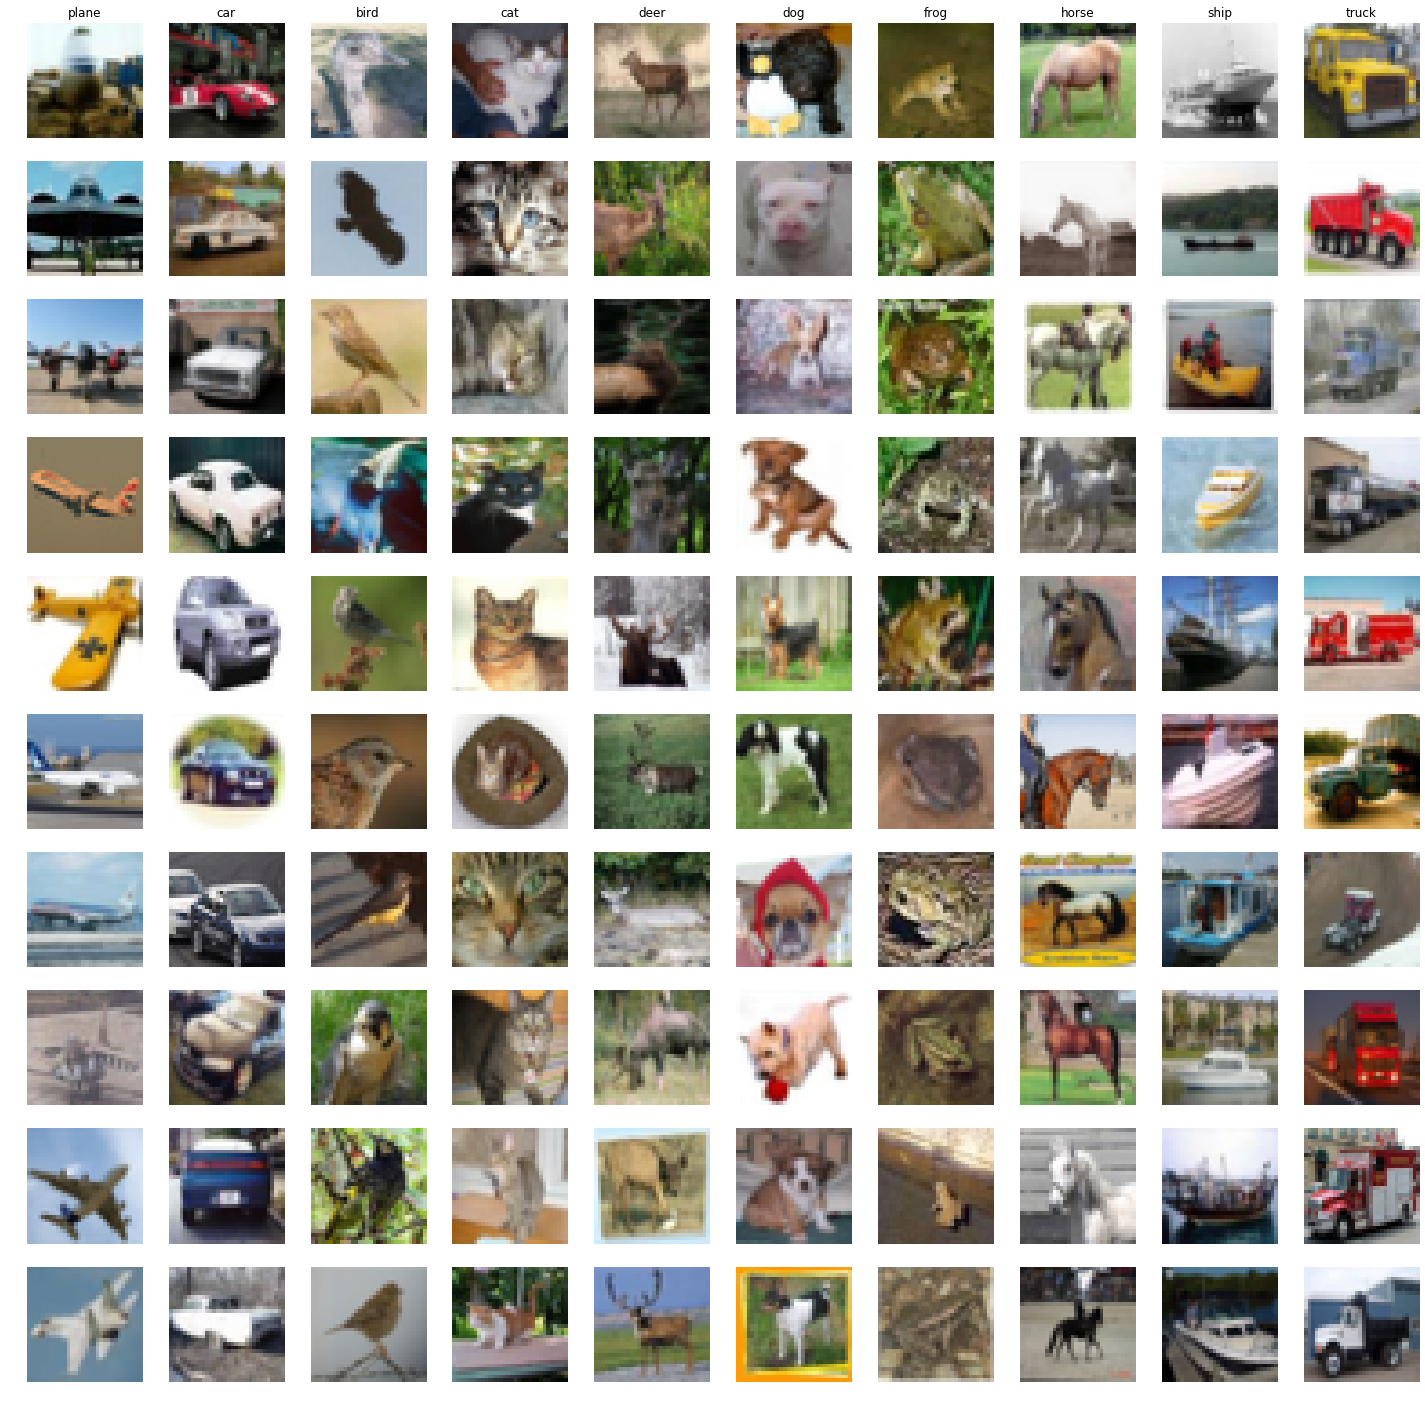

In [88]:
plt.rcParams['figure.figsize'] = (25, 25) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
examples_per_class = 10
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 
           'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

In [89]:
num_training=49000
num_validation=1000
num_test=1000
# Reshape data to rows
X_train = X_train.reshape(num_training, -1)
X_val = X_val.reshape(num_validation, -1)
X_test = X_test.reshape(num_test, -1)

## Work in raw Images

In [90]:
net_params = {'il':X_train.shape[1],'hl1':50,'ol':10}
activ_function = 'Sigmoid'
cost_function = 'Entropy_Loss'
#activ_function = 'ReLu'
#cost_function = 'SoftMax'
net = neural_net(net_params, activ_function, cost_function, std = 1)
lr = 0.01
reg = 0
max_iter = 2000

results = net.train_stochastic_gradient_descent(X_train, y_train, X_val, y_val, 
                                        learning_rate=lr, reg = reg,
                                 max_iter = max_iter, batch_size = 500, verbose =  True, 
                                                epoch = 500)

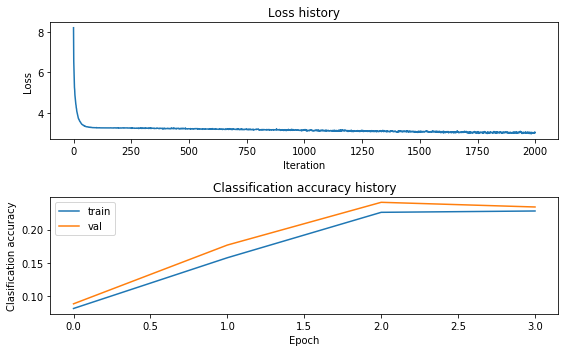

accuracy in training set : 25.16734693877551
accuracy in validation set : 26.400000000000002
accuracy in validation set : 24.8


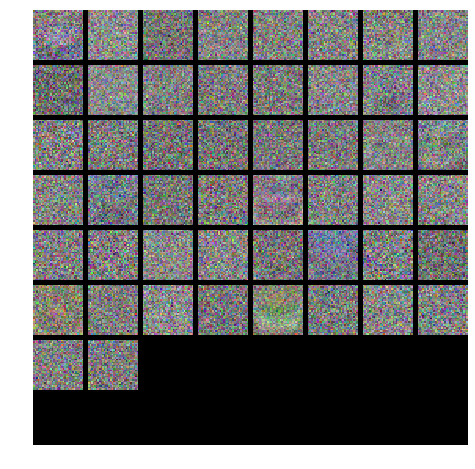

In [91]:
plotStats(results)
y_pred, train_score = net.predict(X_train, with_score=True)
print(f'accuracy in training set : {(y_pred == y_train).mean() *100}')
y_pred_val, val_score = net.predict(X_val, with_score=True)
print(f'accuracy in validation set : {(y_pred_val == y_val).mean() *100}')
y_pred_test, test_score = net.predict(X_test, with_score=True)
print(f'accuracy in validation set : {(y_pred_test == y_test).mean() *100}')
show_net_weights(net)

In [92]:
net_params = {'il':X_train.shape[1],'hl1':50,'ol':10}
# activ_function = 'Sigmoid'
# cost_function = 'Entropy_Loss'
activ_function = 'ReLu'
cost_function = 'SoftMax'
net = neural_net(net_params, activ_function, cost_function, std = 1e-5)
lr = 2.0e-04
reg = 4.789351e-04
max_iter = 2000
# results = net.train_stochastic_gradient_descent(X_train, y_train, X_val, y_val, 
#                                         learning_rate=3.9e-04, reg = 4.789351e-04,
#                                  max_iter = 10000, batch_size = 200, verbose =  True, 
#                                                 epoch = 500)
results = net.train_stochastic_gradient_descent(X_train, y_train, X_val, y_val, 
                                        learning_rate=lr, reg = reg,
                                 max_iter = max_iter, batch_size = 500, verbose =  True, 
                                                epoch = 500)

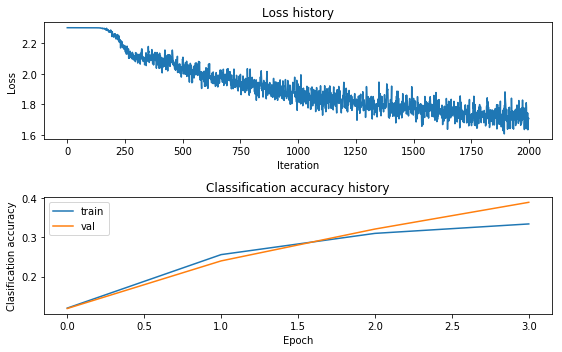

accuracy in training set : 39.406122448979595
accuracy in validation set : 40.5
accuracy in validation set : 36.8


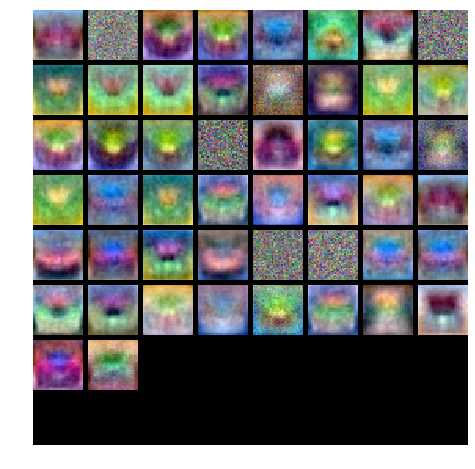

In [93]:
plotStats(results)
y_pred, train_score = net.predict(X_train, with_score=True)
print(f'accuracy in training set : {(y_pred == y_train).mean() *100}')
y_pred_val, val_score = net.predict(X_val, with_score=True)
print(f'accuracy in validation set : {(y_pred_val == y_val).mean() *100}')
y_pred_test, test_score = net.predict(X_test, with_score=True)
print(f'accuracy in validation set : {(y_pred_test == y_test).mean() *100}')
show_net_weights(net)

## Preprocesando las Imagenes
1. Normalizamos los datos: restando la media de la imagen

In [94]:
X_train, y_train, X_val, y_val, X_test, y_test, mean_image = get_CIFAR10_data()
print('Finish Loading Datasets')
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Finish Loading Datasets
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [95]:
# Normalize the data: subtract the mean image
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

# Reshape data to rows
X_train = X_train.reshape(num_training, -1)
X_val = X_val.reshape(num_validation, -1)
X_test = X_test.reshape(num_test, -1)

In [96]:
net_params = {'il':X_train.shape[1],'hl1':416,'ol':10}
activ_function = 'Sigmoid'
cost_function = 'Entropy_Loss'
# activ_function = 'ReLu'
# cost_function = 'SoftMax'
net = neural_net(net_params, activ_function, cost_function, std = 1)
lr = 0.01
reg = 4.789351e-07
max_iter = 2000


results = net.train_stochastic_gradient_descent(X_train, y_train, X_val, y_val, 
                                        learning_rate=lr, reg = reg,
                                 max_iter = max_iter, batch_size = 500, verbose =  True, 
                                                epoch = 500)

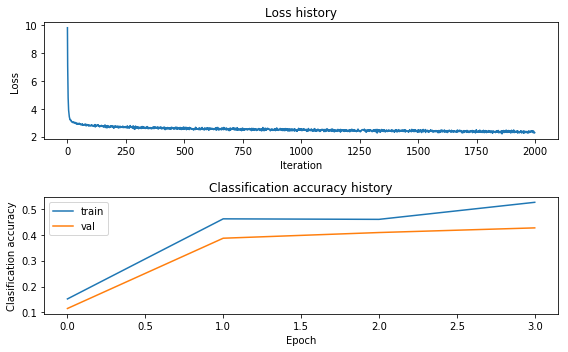

accuracy in training set : 50.41224489795918
accuracy in validation set : 43.6
accuracy in validation set : 40.9


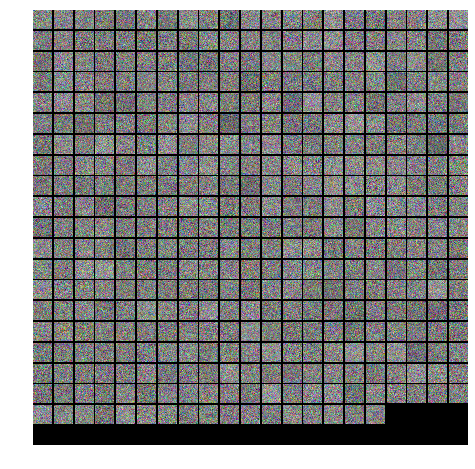

In [97]:
plotStats(results)
y_pred, train_score = net.predict(X_train, with_score=True)
print(f'accuracy in training set : {(y_pred == y_train).mean() *100}')
y_pred_val, val_score = net.predict(X_val, with_score=True)
print(f'accuracy in validation set : {(y_pred_val == y_val).mean() *100}')
y_pred_test, test_score = net.predict(X_test, with_score=True)
print(f'accuracy in validation set : {(y_pred_test == y_test).mean() *100}')
show_net_weights(net)

In [98]:
net_params = {'il':X_train.shape[1],'hl1':416,'ol':10}
#activ_function = 'Sigmoid'
#cost_function = 'Entropy_Loss'
activ_function = 'ReLu'
cost_function = 'SoftMax'
net = neural_net(net_params, activ_function, cost_function, std = 1e-4)
lr =5.0e-04
reg = 4.789351e-07
max_iter = 2000


results = net.train_stochastic_gradient_descent(X_train, y_train, X_val, y_val, 
                                        learning_rate=lr, reg = reg,
                                 max_iter = max_iter, batch_size = 500, verbose =  True, 
                                                epoch = 500)

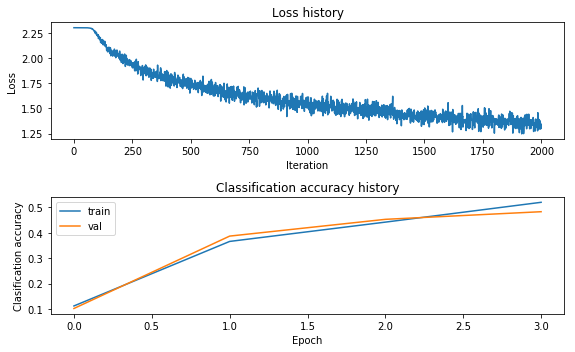

accuracy in training set : 53.54489795918367
accuracy in validation set : 50.3
accuracy in validation set : 50.4


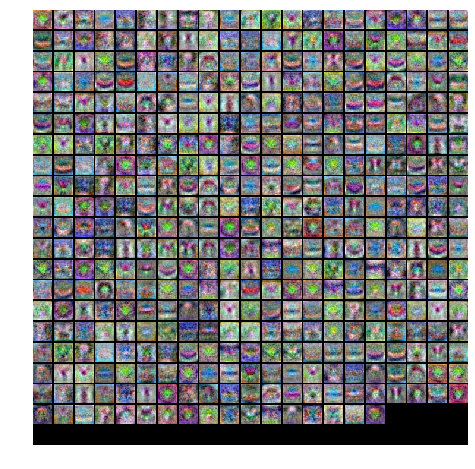

In [99]:
plotStats(results)
y_pred, train_score = net.predict(X_train, with_score=True)
print(f'accuracy in training set : {(y_pred == y_train).mean() *100}')
y_pred_val, val_score = net.predict(X_val, with_score=True)
print(f'accuracy in validation set : {(y_pred_val == y_val).mean() *100}')
y_pred_test, test_score = net.predict(X_test, with_score=True)
print(f'accuracy in validation set : {(y_pred_test == y_test).mean() *100}')
show_net_weights(net)

## Histogram
1. Extraer el histograma de la Imagen

In [118]:
import cv2
from tqdm.autonotebook import tqdm
X_train_hist = np.zeros(shape=X_train.shape)
X_val_hist = np.zeros(shape=X_val.shape)
X_test_hist = np.zeros(shape=X_test.shape)

with tqdm(total=X_train.shape[0]) as pbar:
    for i in range(X_train.shape[0]):
        img = np.float32(X_train[i])/255
        # Calculate gradient 
        gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
        gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
        mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
        X_train_hist[i] = mag
        pbar.set_description(f'{i}/{X_train.shape[0]}')
        pbar.update(1)
        
with tqdm(total=X_val.shape[0]) as pbar:
    for i in range(X_val.shape[0]):
        img = np.float32(X_val[i])/255
        # Calculate gradient 
        gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
        gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
        mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
        X_val_hist[i] = mag
        pbar.set_description(f'{i}/{X_val.shape[0]}')
        pbar.update(1)
        
with tqdm(total=X_test.shape[0]) as pbar:
    for i in range(X_test.shape[0]):
        img = np.float32(X_test[i])/255
        # Calculate gradient 
        gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
        gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
        mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
        X_test_hist[i] = mag
        pbar.set_description(f'{i}/{X_test.shape[0]}')
        pbar.update(1)

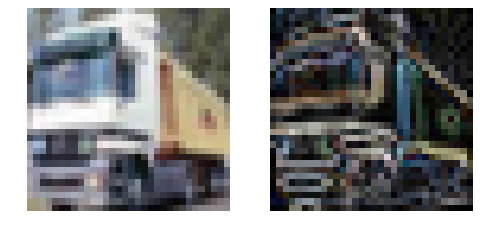

In [119]:
plt.subplot(1,2,1)
plt.imshow(X_train[1].astype('uint8'))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(X_train_hist[1])
plt.axis('off')
plt.show()

In [ ]:
num_training=49000
num_validation=1000
num_test=1000
# Reshape data to rows
X_train_hist = X_train_hist.reshape(num_training, -1)
X_val_hist = X_val_hist.reshape(num_validation, -1)
X_test_hist = X_test_hist.reshape(num_test, -1)

In [ ]:
net_params = {'il':X_train_hist.shape[1],'hl1':416,'ol':10}
activ_function = 'Sigmoid'
cost_function = 'Entropy_Loss'
# activ_function = 'ReLu'
# cost_function = 'SoftMax'
net = neural_net(net_params, activ_function, cost_function, std = 1)
lr = 0.09
reg = 4.789351e-07
max_iter = 2000

results = net.train_stochastic_gradient_descent(X_train_hist, y_train, X_val_hist, y_val, 
                                        learning_rate=lr, reg = reg,
                                 max_iter = max_iter, batch_size = 500, verbose =  True, 
                                                epoch = 500)

In [ ]:
plotStats(results)
y_pred, train_score = net.predict(X_train_hist, with_score=True)
print(f'accuracy in training set : {(y_pred == y_train).mean() *100}')
y_pred_val, val_score = net.predict(X_val_hist, with_score=True)
print(f'accuracy in validation set : {(y_pred_val == y_val).mean() *100}')
y_pred_test, test_score = net.predict(X_test_hist, with_score=True)
print(f'accuracy in validation set : {(y_pred_test == y_test).mean() *100}')
show_net_weights(net)

In [ ]:
net_params = {'il':X_train_hist.shape[1],'hl1':416,'ol':10}
#activ_function = 'Sigmoid'
#cost_function = 'Entropy_Loss'
activ_function = 'ReLu'
cost_function = 'SoftMax'
net = neural_net(net_params, activ_function, cost_function, std = 1)
lr = 5e-01
reg = 4.789351e-07
max_iter = 2000

results = net.train_stochastic_gradient_descent(X_train_hist, y_train, X_val_hist, y_val, 
                                        learning_rate=lr, reg = reg,
                                 max_iter = max_iter, batch_size = 500, verbose =  True, 
                                                epoch = 500)

In [ ]:
plotStats(results)
y_pred, train_score = net.predict(X_train_hist, with_score=True)
print(f'accuracy in training set : {(y_pred == y_train).mean() *100}')
y_pred_val, val_score = net.predict(X_val_hist, with_score=True)
print(f'accuracy in validation set : {(y_pred_val == y_val).mean() *100}')
y_pred_test, test_score = net.predict(X_test_hist, with_score=True)
print(f'accuracy in validation set : {(y_pred_test == y_test).mean() *100}')
show_net_weights(net)

## Extracción total de características de los datos
1. Histogram + color selected
2. Normalization
3. standard deviation


In [100]:
# Train on histogram Images
X_train, y_train, X_val, y_val, X_test, y_test, mean_image = get_CIFAR10_data()
print('Finish Loading Datasets')
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

from features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns, verbose = True)
X_test_feats = extract_features(X_test, feature_fns, verbose = True)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])
print('finish')

Finish Loading Datasets
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)



finish


In [101]:
print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(f'train data feats shape {X_train_feats.shape}')
print(f'val data feats shape {X_val_feats.shape}')
print(f'test data feats shape {X_test_feats.shape}')

(49000, 155)
train data feats shape (49000, 154)
val data feats shape (1000, 154)
test data feats shape (1000, 154)


In [102]:
net_params = {'il':X_train_feats.shape[1],'hl1':416,'ol':10}
activ_function = 'Sigmoid'
cost_function = 'Entropy_Loss'
# activ_function = 'ReLu'
# cost_function = 'SoftMax'
net = neural_net(net_params, activ_function, cost_function, std = 1)
lr = 0.9
reg = 4.789351e-07
max_iter = 2000

results = net.train_stochastic_gradient_descent(X_train_feats, y_train, X_val_feats, y_val, 
                                        learning_rate=lr, reg = reg,
                                 max_iter = max_iter, batch_size = 500, verbose =  True, 
                                                epoch = 500)

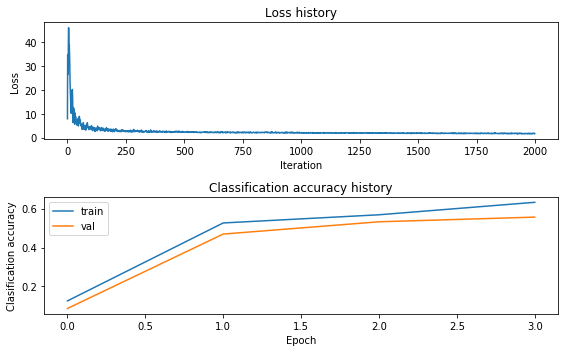

accuracy in training set : 62.8938775510204
accuracy in validation set : 56.599999999999994
accuracy in validation set : 57.9


In [103]:
plotStats(results)
y_pred, train_score = net.predict(X_train_feats, with_score=True)
print(f'accuracy in training set : {(y_pred == y_train).mean() *100}')
y_pred_val, val_score = net.predict(X_val_feats, with_score=True)
print(f'accuracy in validation set : {(y_pred_val == y_val).mean() *100}')
y_pred_test, test_score = net.predict(X_test_feats, with_score=True)
print(f'accuracy in validation set : {(y_pred_test == y_test).mean() *100}')

In [104]:
net_params = {'il':X_train_feats.shape[1],'hl1':416,'ol':10}
#activ_function = 'Sigmoid'
#cost_function = 'Entropy_Loss'
activ_function = 'ReLu'
cost_function = 'SoftMax'
net = neural_net(net_params, activ_function, cost_function, std = 1)
lr = 5e-01
reg = 4.789351e-07
max_iter = 2000

results = net.train_stochastic_gradient_descent(X_train_feats, y_train, X_val_feats, y_val, 
                                        learning_rate=lr, reg = reg,
                                 max_iter = max_iter, batch_size = 500, verbose =  True, 
                                                epoch = 500)

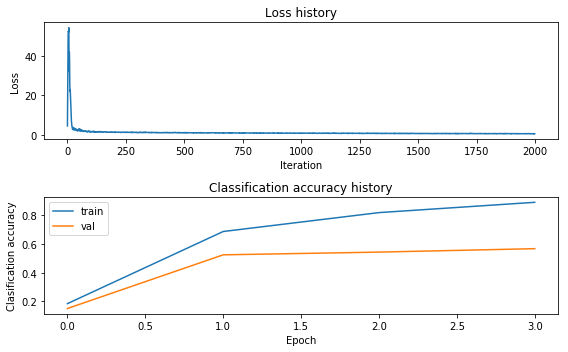

accuracy in training set : 81.83265306122449
accuracy in validation set : 55.50000000000001
accuracy in validation set : 53.900000000000006


In [105]:
plotStats(results)
y_pred, train_score = net.predict(X_train_feats, with_score=True)
print(f'accuracy in training set : {(y_pred == y_train).mean() *100}')
y_pred_val, val_score = net.predict(X_val_feats, with_score=True)
print(f'accuracy in validation set : {(y_pred_val == y_val).mean() *100}')
y_pred_test, test_score = net.predict(X_test_feats, with_score=True)
print(f'accuracy in validation set : {(y_pred_test == y_test).mean() *100}')

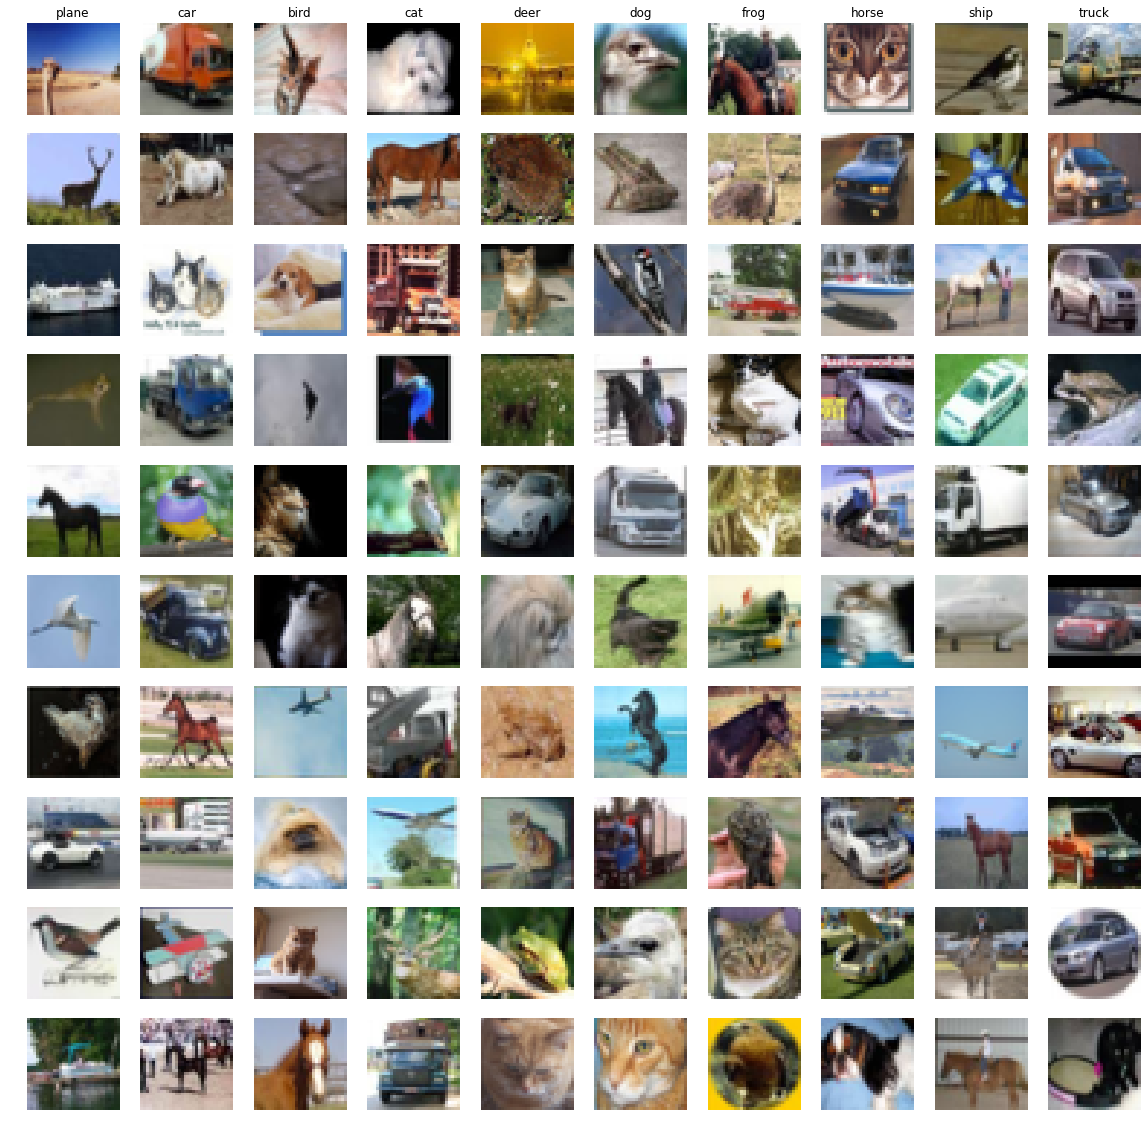

In [124]:
plt.rcParams['figure.figsize'] = (20, 20) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
examples_per_class = 10
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_train != cls) & (y_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

In [113]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 
               'frog', 'horse', 'ship', 'truck']
stri = ''
for i, clas in enumerate(classes):
    stri = stri+','+str(i)+': '+clas

0: plane,1: car,2: bird,3: cat,4: deer,5: dog,6: frog,7: horse,8: ship,9: truck


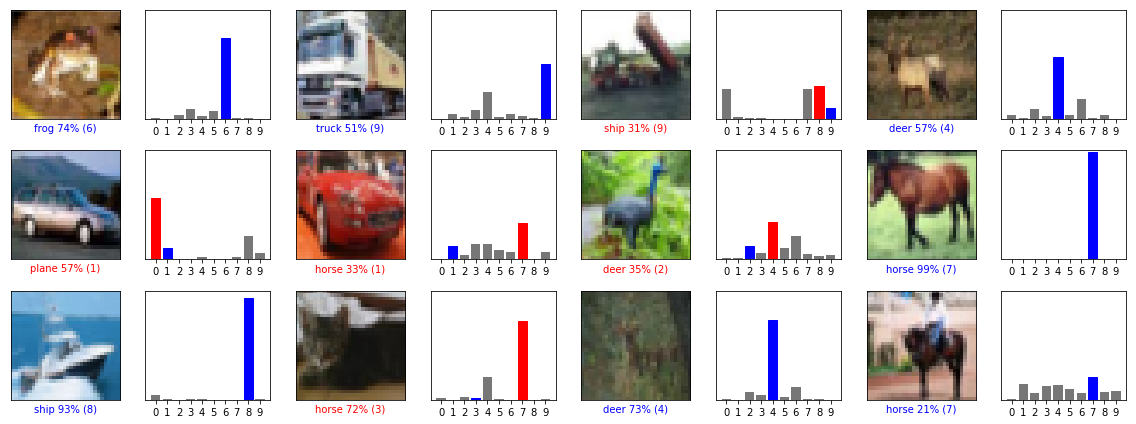

In [114]:
print(stri[1:])
num_rows = 3
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, train_score[i], y_train, X_train)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, train_score[i], y_train)
plt.tight_layout()
plt.show()

## State of the art technique
1. Pytorch

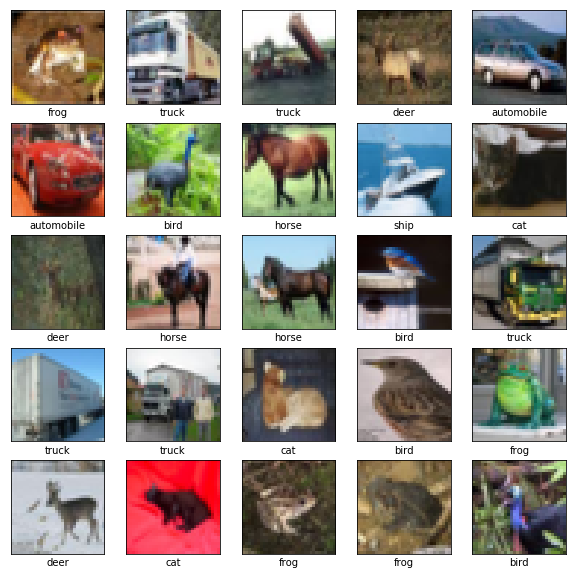

In [132]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

train_images = X_train/255
test_images = X_test/255
val_images = X_val/255
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [133]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [134]:
weights_history = []

# A custom callback
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback
class MyCallback(keras.callbacks.Callback):
    def on_batch_end(self, batch, logs):
        weights_history.append(model.get_weights())


callback = MyCallback()

In [135]:
history = model.fit(train_images, y_train, epochs=10, 
                    validation_data=(val_images, y_val), callbacks=[callback])

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 47s 958us/sample - loss: 1.5210 - accuracy: 0.4461 - val_loss: 1.2260 - val_accuracy: 0.5550
Epoch 2/10
49000/49000 [==============================] - 43s 873us/sample - loss: 1.1617 - accuracy: 0.5884 - val_loss: 1.1158 - val_accuracy: 0.6010
Epoch 3/10
49000/49000 [==============================] - 42s 865us/sample - loss: 1.0247 - accuracy: 0.6392 - val_loss: 0.9700 - val_accuracy: 0.6730
Epoch 4/10
49000/49000 [==============================] - 43s 867us/sample - loss: 0.9307 - accuracy: 0.6730 - val_loss: 0.9664 - val_accuracy: 0.6720
Epoch 5/10
49000/49000 [==============================] - 43s 881us/sample - loss: 0.8567 - accuracy: 0.7013 - val_loss: 0.9565 - val_accuracy: 0.6740
Epoch 6/10
49000/49000 [==============================] - 43s 868us/sample - loss: 0.8065 - accuracy: 0.7176 - val_loss: 0.8441 - val_accuracy: 0.7090
Epoch 7/10
49000/49000 [=====================

1000/1 - 0s - loss: 217.8333 - accuracy: 0.5200


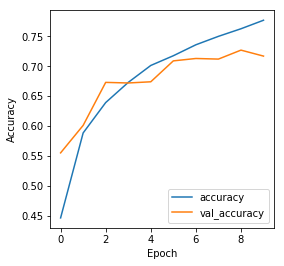

In [153]:
plt.rcParams['figure.figsize'] = (4, 4)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)